In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [173]:
from google.colab import files

In [174]:
# files.upload()

In [175]:
df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [176]:
X = df.drop(columns = 'label')
y = df.label

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 77, test_size = .20)

In [177]:
X_train.shape

(48000, 784)

In [178]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59747,0,0,0,0,0,0,0,0,0,38,...,47,0,1,0,0,0,0,0,0,0
54501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55873,0,0,0,0,0,0,0,0,6,10,...,0,0,0,31,54,19,0,0,0,0
6524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57904,0,0,0,0,0,0,0,0,0,0,...,113,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42277,0,0,0,0,0,0,0,7,87,145,...,153,131,167,123,0,0,0,0,0,0
18667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
np.sqrt(784)

28.0

In [180]:
X_train = X_train / 255
X_test = X_test / 255

In [181]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(-1,28,28,1)

In [182]:
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,28,28,1)

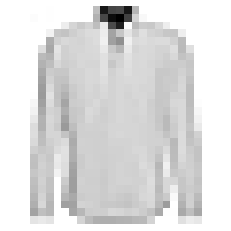

In [183]:
plt.axis('off')
plt.imshow(X_train[7], cmap='binary');

In [184]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 5, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [185]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='rmsprop',
    metrics=['acc']
)

In [186]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=10
)

Epoch 1/10
375/375 [==============================] - 4s 7ms/step - loss: 0.5978 - acc: 0.7834 - val_loss: 0.3818 - val_acc: 0.8615
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3553 - acc: 0.8716 - val_loss: 0.3119 - val_acc: 0.8840
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2969 - acc: 0.8919 - val_loss: 0.2734 - val_acc: 0.9003
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2604 - acc: 0.9047 - val_loss: 0.2654 - val_acc: 0.9049
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2339 - acc: 0.9138 - val_loss: 0.2640 - val_acc: 0.9039
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2117 - acc: 0.9226 - val_loss: 0.2474 - val_acc: 0.9080
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1911 - acc: 0.9296 - val_loss: 0.2430 - val_acc: 0.9149
Epoch 8/10
375/375 [==============================] - 2s 6ms/step - loss: 0.

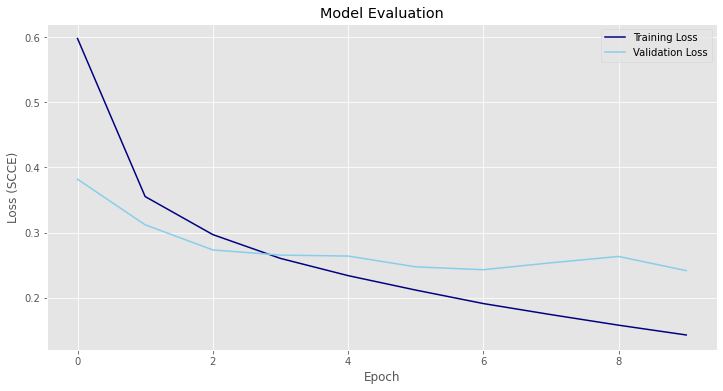

In [187]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.title('Model Evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss (SCCE)')
plt.legend();

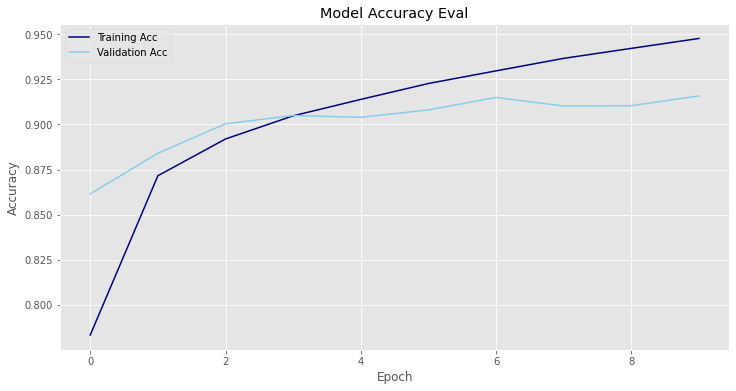

In [188]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['acc'], c='navy', label='Training Acc')
plt.plot(history.history['val_acc'], c='skyblue', label='Validation Acc')
plt.title('Model Accuracy Eval')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

In [189]:
model.evaluate(X_test, y_test)

375/375 [==============================] - 1s 3ms/step - loss: 0.2416 - acc: 0.9158


[0.24159255623817444, 0.9157500267028809]

In [190]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

375/375 [==============================] - 1s 2ms/step


array([0, 5, 8, ..., 6, 1, 6])

In [191]:
y_test = y_test.to_numpy()

In [192]:
class_map = {
    0:'T-shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:"Sneaker",
    8:'Bag',
    9:'Ankle boot'
}

In [193]:
targets = class_map.values()
print(classification_report(y_test, y_pred, target_names=targets))

              precision    recall  f1-score   support

     T-shirt       0.88      0.86      0.87      1180
     Trouser       1.00      0.98      0.99      1211
    Pullover       0.89      0.84      0.86      1178
       Dress       0.92      0.92      0.92      1208
        Coat       0.87      0.86      0.87      1222
      Sandal       0.99      0.97      0.98      1199
       Shirt       0.73      0.82      0.77      1171
     Sneaker       0.94      0.98      0.96      1256
         Bag       0.99      0.97      0.98      1201
  Ankle boot       0.98      0.95      0.96      1174

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



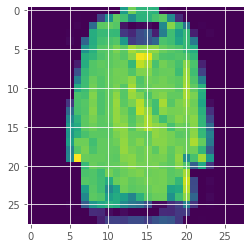

We thought = Coat, but really Shirt


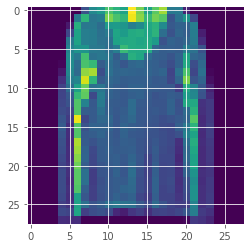

We thought = Shirt, but really Pullover


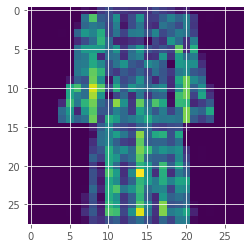

We thought = Shirt, but really Dress


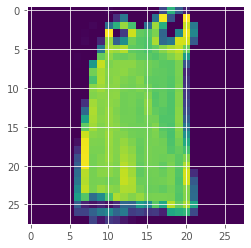

We thought = Shirt, but really T-shirt


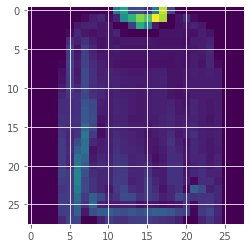

We thought = Shirt, but really Pullover


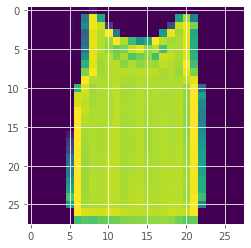

We thought = T-shirt, but really Shirt


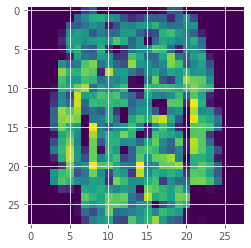

We thought = Shirt, but really T-shirt


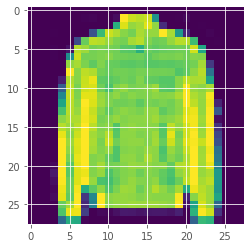

We thought = Shirt, but really Coat


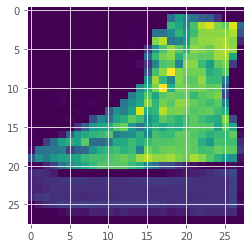

We thought = Sneaker, but really Ankle boot


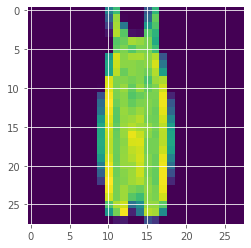

We thought = Dress, but really Trouser


In [194]:
wrong_ix = np.where(y_pred != y_test)[0]
for i in wrong_ix[:10]:
    plt.clf()
    plt.imshow(X_test[i])
    plt.show()
    pred = y_pred[i]
    truth = y_test[i]
    print(f'We thought = {class_map[pred]}, but really {class_map[truth]}',end = '\n')

## Now using full dataset:

In [195]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
X_test = test_df.drop(columns='label')
X_train = df.drop(columns='label')
y_train = df['label']

In [197]:
X_train = X_train.to_numpy()
X_train = X_train / 255
X_train = X_train.reshape(-1,28,28,1)

X_test = X_test.to_numpy()
X_test = X_test/255
X_test = X_test.reshape(-1,28,28,1)

y_train = y_train.to_numpy()

In [198]:
model = Sequential()

# Make a convolutional layer with 32 filters.
model.add(Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1)))

# MaxPool the results (basically a requirement)
model.add(MaxPooling2D(2))

# Let's add another convolution block
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Finally, flatten the output and make a predictions through a dense layer.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [199]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='rmsprop',
    metrics=['acc']
)

In [200]:
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10
)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.5227 - acc: 0.8080
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3217 - acc: 0.8819
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2664 - acc: 0.9021
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2333 - acc: 0.9138
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2055 - acc: 0.9238
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1815 - acc: 0.9321
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1614 - acc: 0.9398
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1421 - acc: 0.9470
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1242 - acc: 0.9542
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1101 - acc: 0.9588


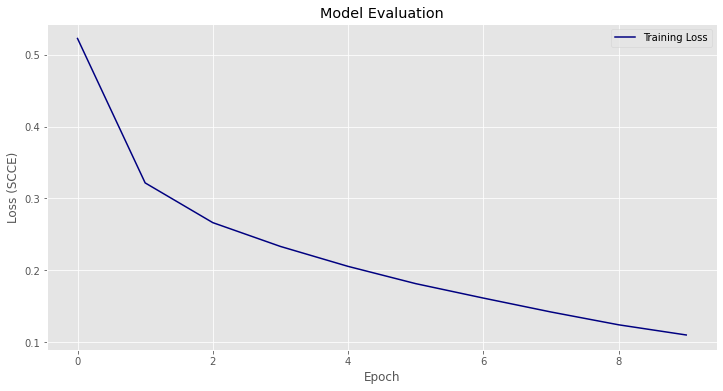

In [201]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
# plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.title('Model Evaluation')
plt.xlabel('Epoch')
plt.ylabel('Loss (SCCE)')
plt.legend();

In [202]:
preds = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 3ms/step


In [203]:
preds

array([0, 1, 2, ..., 8, 8, 1])

In [204]:
submit = pd.DataFrame(preds).rename(columns={0:'pred_class'})

In [205]:
submit.head()

,pred_class
0,0
1,1
2,2
3,2
4,3


In [206]:
submit.to_csv('group1-hackathon-p4.csv')

In [207]:
files.download('group1-hackathon-p4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>